##K nearest neighbour
 
- run the k nearest neighbour algorithm for a range of values of k
- output the prediction and compare with the true values on the validation set
- choose best k and run the k nearest neighbour on the test data using that value

In [2]:
import numpy as np
import pandas as pd

def data_cleaner(data):
    #remove the id, partlybad columns
    data.drop(["id","partlybad"],1,inplace=True)
    #set new index using the date column
    data.set_index(["date"],inplace=True)
    #add binary 'class2' col for event/non-event
    data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
    #arrange to put class2 col at the front
    cols = ['class2'] + [col for col in data if col != 'class2']
    data = data[cols]
    return data

In [3]:
import pandas as pd
import numpy as np

#load training data
url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/train.csv"
npf_train_raw = pd.read_csv(url)
npf_train = data_cleaner(npf_train_raw)

#create feature array and target column for training data
X_train = npf_train.iloc[:,2:]
y_train = npf_train["class2"]

#import test data
npf_test_raw = pd.read_csv("https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/test.csv")
npf_test = data_cleaner(npf_test_raw)

#create feature array and target column for test data
X_test = npf_train.iloc[:,2:]
y_test = npf_train["class2"]

rate of correct predictions for k = 2 0.8914728682170543
rate of correct predictions for k = 3 0.8837209302325582
rate of correct predictions for k = 4 0.8217054263565892
rate of correct predictions for k = 5 0.8294573643410853
rate of correct predictions for k = 6 0.8023255813953488
rate of correct predictions for k = 7 0.8217054263565892
rate of correct predictions for k = 8 0.7945736434108527
rate of correct predictions for k = 9 0.813953488372093
rate of correct predictions for k = 10 0.7945736434108527
rate of correct predictions for k = 11 0.8023255813953488
rate of correct predictions for k = 12 0.7868217054263565
rate of correct predictions for k = 13 0.7751937984496124
rate of correct predictions for k = 14 0.7713178294573644
rate of correct predictions for k = 15 0.7829457364341085
rate of correct predictions for k = 16 0.7751937984496124
rate of correct predictions for k = 17 0.7906976744186046
rate of correct predictions for k = 18 0.7751937984496124
rate of correct predict

(2.0, 40.95)

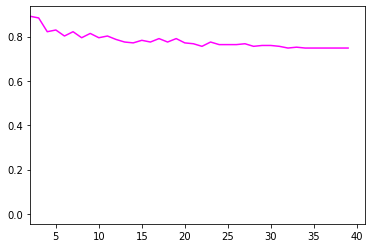

In [4]:
#this should be done on validation set?
#run k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt

pred_rate = np.zeros(40)

for k in range(2,40):
    #run algorithm
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    #predicted values for class2
    y_predictions = knn.predict(X_test)
    #compare predictions with actual results
    y_s = np.c_[y_test,y_predictions]
    correct_ind = np.where(y_s[:,0] == y_s[:,1], 1,0)
    #% accuracy
    pred_rate[k] = np.mean(correct_ind)
    print('rate of correct predictions for k = %i' %k,pred_rate[k])

f, ax = plt.subplots(1)
plt.plot(pred_rate,color="fuchsia")
ax.set_xlim(xmin=2)

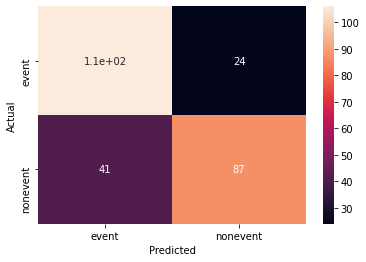

In [5]:
#k=40 
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

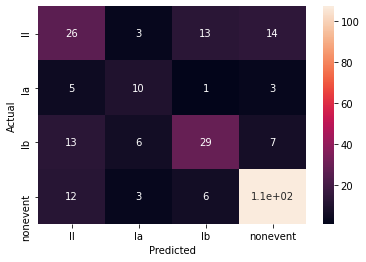

In [6]:
#try multi classifiers with k nearest? 

y_train_multi = npf_train["class4"]

y_test_multi = npf_train["class4"]

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train_multi) 
#predicted values for class2
y_predictions_multi = knn.predict(X_test)

confusion_matrix = pd.crosstab(y_test_multi, y_predictions_multi, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


In [7]:

#run the same with optimal k = ...? 
#npf 'hidden' data set

npf_test_hidden_raw = pd.read_csv("https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/npf_test_hidden.csv")
npf_test_hidden = data_cleaner(npf_test_hidden_raw)

#create feature array and target column for test data
X_test_hidden = npf_test_hidden.iloc[:,2:]
y_test_hidden = npf_test_hidden["class2"]

#run algorithm for k=2
knn = KNeighborsClassifier(n_neighbors=2) 
#using the training data as before
knn.fit(X_train, y_train) 
#predicted values for class2
y_predictions = knn.predict(X_test_hidden)

print(y_predictions)

['event' 'event' 'nonevent' 'event' 'event' 'event' 'event' 'nonevent'
 'nonevent' 'event' 'nonevent' 'event' 'event' 'event' 'event' 'event'
 'nonevent' 'nonevent' 'event' 'event' 'event' 'event' 'event' 'nonevent'
 'event' 'event' 'event' 'nonevent' 'event' 'nonevent' 'event' 'event'
 'nonevent' 'event' 'nonevent' 'nonevent' 'nonevent' 'event' 'event'
 'event' 'nonevent' 'event' 'event' 'nonevent' 'nonevent' 'event'
 'nonevent' 'event' 'event' 'event' 'nonevent' 'nonevent' 'event'
 'nonevent' 'nonevent' 'nonevent' 'event' 'nonevent' 'nonevent' 'nonevent'
 'event' 'nonevent' 'event' 'event' 'event' 'event' 'event' 'event'
 'event' 'nonevent' 'nonevent' 'nonevent' 'event' 'event' 'nonevent'
 'event' 'event' 'nonevent' 'nonevent' 'event' 'nonevent' 'event' 'event'
 'event' 'event' 'event' 'event' 'event' 'event' 'nonevent' 'event'
 'nonevent' 'event' 'event' 'nonevent' 'event' 'nonevent' 'event' 'event'
 'event' 'nonevent' 'nonevent' 'nonevent' 'event' 'event' 'event' 'event'
 'event' '

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy:  0.8488372093023255


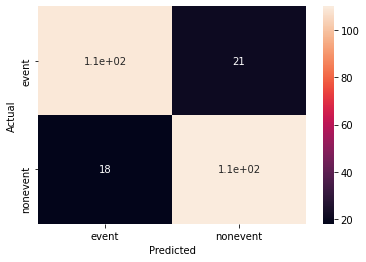

In [8]:
#logistic regression

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#binary classifier with logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy:  0.7131782945736435


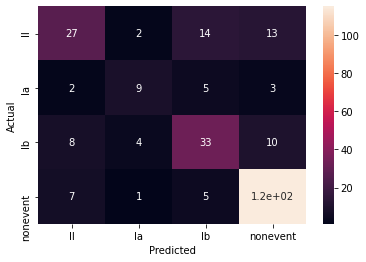

In [9]:
#multivariate classifier with logistic regression

y_train_multi = npf_train["class4"]

y_test_multi = npf_train["class4"]

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train_multi)
y_pred_multi = logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test_multi, y_pred_multi, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test_multi, y_pred_multi))

#conclusion... not doing too good with this one. 